In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv("vendas_supermercado.csv")
display(df.head())  # Para visualização das primeiras linhas do DataFrame

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [214]:
# Converte a data para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Cria uma coluna de mês para análise
df['Month'] = df['Date'].dt.to_period('M')

In [215]:
# Faturamento por mês
faturamento_mensal = df.groupby('Month')['Total'].sum()

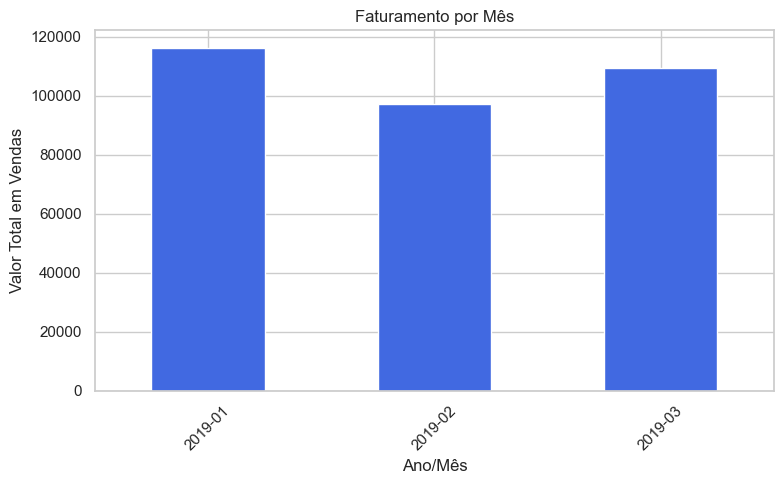

In [216]:
# Plot do faturamento
plt.figure(figsize=(8, 5))
faturamento_mensal.plot(kind='bar', color='royalblue')
plt.title('Faturamento por Mês')
plt.ylabel('Valor Total em Vendas')
plt.xlabel('Ano/Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./imagens/grafico_faturamento_mensal.png')
plt.show()

In [217]:
# Top 5 produtos
top_produtos = df.groupby('Product line')['Total'].sum().round(2).sort_values(ascending=False).head(5)
print(top_produtos.to_dict())

{'Food and beverages': 56144.84, 'Sports and travel': 55122.83, 'Electronic accessories': 54337.53, 'Fashion accessories': 54305.9, 'Home and lifestyle': 53861.91}


In [218]:
# Formas de pagamento
pagamentos = df['Payment'].value_counts(normalize=True) * 100
print(pagamentos.to_dict())

{'Ewallet': 34.5, 'Cash': 34.4, 'Credit card': 31.1}


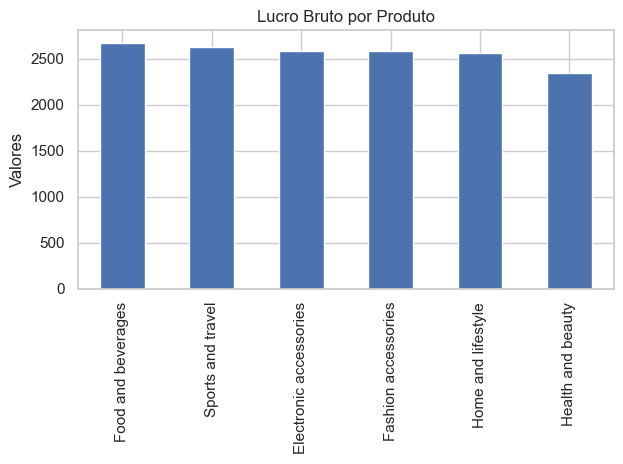

In [219]:
# Produtos com maior lucro bruto:
df.groupby('Product line')['gross income'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Lucro Bruto por Produto')
plt.ylabel('Valores')
plt.xlabel('')
plt.tight_layout()
plt.savefig('./imagens/grafico_lucro_bruto_produtos.png')
plt.show()

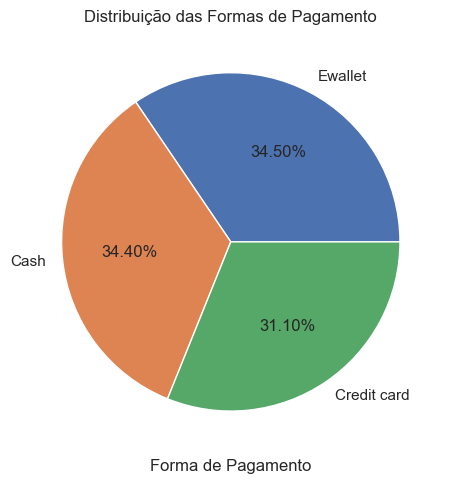

In [220]:
# Distribuição das formas de pagamento
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
df['Payment'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribuição das Formas de Pagamento')
plt.ylabel('')
plt.xlabel('Forma de Pagamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./imagens/grafico_pagamentos.png')
plt.show()

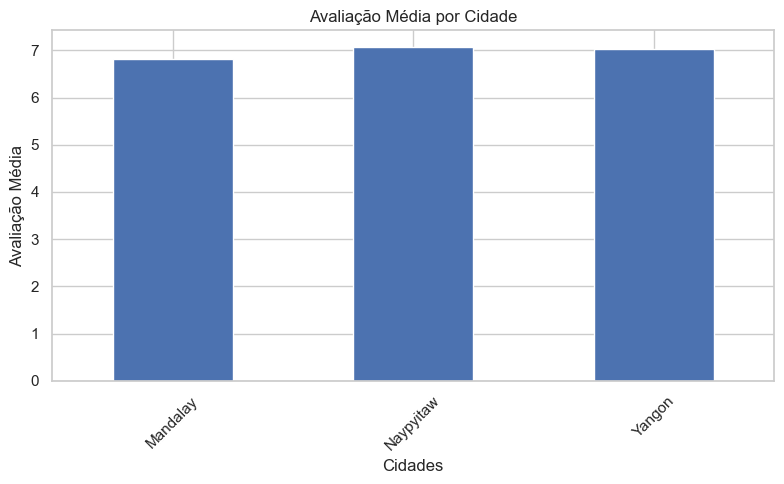

In [221]:
# Avaliação média por cidade
plt.figure(figsize=(8, 5))
df.groupby('City')['Rating'].mean().plot(kind='bar')
plt.title('Avaliação Média por Cidade')
plt.ylabel('Avaliação Média')
plt.xlabel('Cidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./imagens/grafico_avaliacao_cidade.png')
plt.show()
